<a href="https://colab.research.google.com/github/Flychuban/Liver-Disease-Prediction/blob/main/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [25]:
df = pd.read_csv(r'/content/drive/MyDrive/LiverDiseasePrediction/data/archive/train.csv', encoding= 'unicode_escape')

In [26]:
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [5]:
df.shape

(30691, 11)

In [6]:
df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


                                      Age of the patient  Total Bilirubin  \
Age of the patient                              1.000000        -0.001600   
Total Bilirubin                                -0.001600         1.000000   
Direct Bilirubin                               -0.001521         0.886987   
 Alkphos Alkaline Phosphotase                  -0.000761         0.197183   
 Sgpt Alamine Aminotransferase                  0.000659         0.207893   
Sgot Aspartate Aminotransferase                 0.006104         0.240273   
Total Protiens                                 -0.007951         0.001185   
 ALB Albumin                                   -0.015164        -0.222522   
A/G Ratio Albumin and Globulin Ratio           -0.018056        -0.197978   
Result                                         -0.004759        -0.225061   

                                      Direct Bilirubin  \
Age of the patient                           -0.001521   
Total Bilirubin                     

<ipython-input-7-74fe7ede48d5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr_matrix = df.corr()


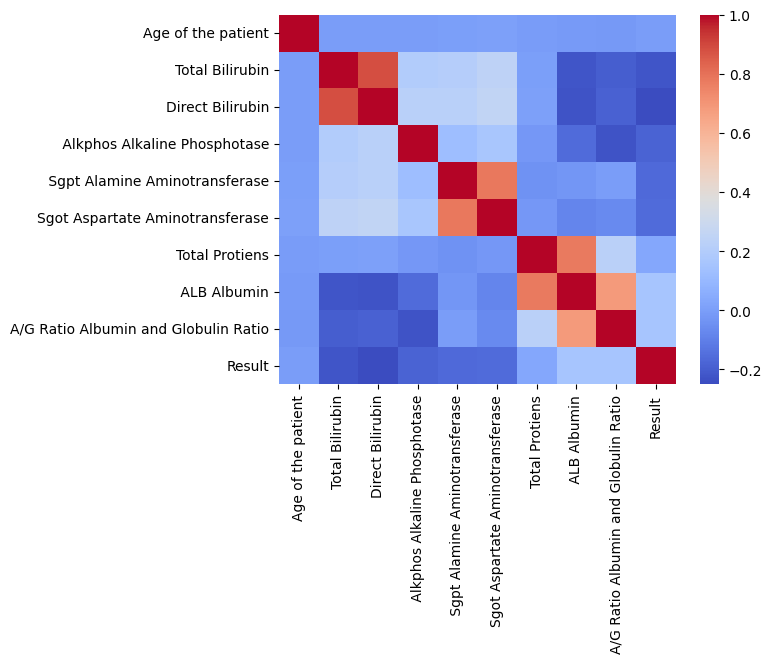

In [7]:
# Creating the correlation matrix of the iris dataset
data_corr_matrix = df.corr()
print(data_corr_matrix)

# Create the heatmap using the `heatmap` function of Seaborn
sns.heatmap(data_corr_matrix, cmap='coolwarm')

# Display the heatmap using the `show` method of the `pyplot` module from matplotlib.
plt.show()

From this plot we can see that df has good correlations

We have to make strings into numbers in case model to train better

In [28]:
encoder = LabelEncoder()

In [36]:
df = df.apply(encoder.fit_transform)
df

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,58,0,3,0,72,6,8,34,21,31,0
1,55,1,69,45,236,54,86,41,20,23,0
2,55,1,56,36,202,50,58,36,21,30,0
3,52,1,6,3,67,4,10,34,22,37,0
4,64,1,35,19,80,17,49,39,12,4,0
...,...,...,...,...,...,...,...,...,...,...,...
30686,44,1,18,9,224,7,18,39,14,12,0
30687,49,1,25,12,200,12,24,36,12,9,0
30688,48,1,54,29,212,88,56,30,19,31,0
30689,42,0,15,9,108,6,45,9,4,14,0


In [37]:
y = df['Result']
X = df.drop(['Result'], axis=1)
X

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
0,58,0,3,0,72,6,8,34,21,31
1,55,1,69,45,236,54,86,41,20,23
2,55,1,56,36,202,50,58,36,21,30
3,52,1,6,3,67,4,10,34,22,37
4,64,1,35,19,80,17,49,39,12,4
...,...,...,...,...,...,...,...,...,...,...
30686,44,1,18,9,224,7,18,39,14,12
30687,49,1,25,12,200,12,24,36,12,9
30688,48,1,54,29,212,88,56,30,19,31
30689,42,0,15,9,108,6,45,9,4,14


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [39]:
# Random Forest hyperparameters
n_estimators = [int(x) for x in np.linspace(start=10, stop=80, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [2, 4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [40]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}
param_grid

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [2, 4],
 'min_samples_split': [2, 5],
 'min_samples_leaf': [1, 2],
 'bootstrap': [True, False]}

In [41]:
rf_model = RandomForestClassifier()

In [42]:
rf_RandomGrid = RandomizedSearchCV(estimator = rf_model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs=4)

In [43]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [46]:
rf_RandomGrid.best_params_

{'n_estimators': 48,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': True}